# Data Loading and Initial Exploration

First, loading the data and perform some basic exploration to understand its structure and content.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import csv

In [2]:
# Reading in the data
car_sale = pd.read_csv('car_sales_data.csv')

# Display the data
car_sale

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


In [3]:
# Basic information about the dataset
car_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [4]:
# Statistical summary of the dataset
car_sale.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [5]:
# Check for missing values
car_sale.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

# Exploratory Data Analysis (EDA)

In [6]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

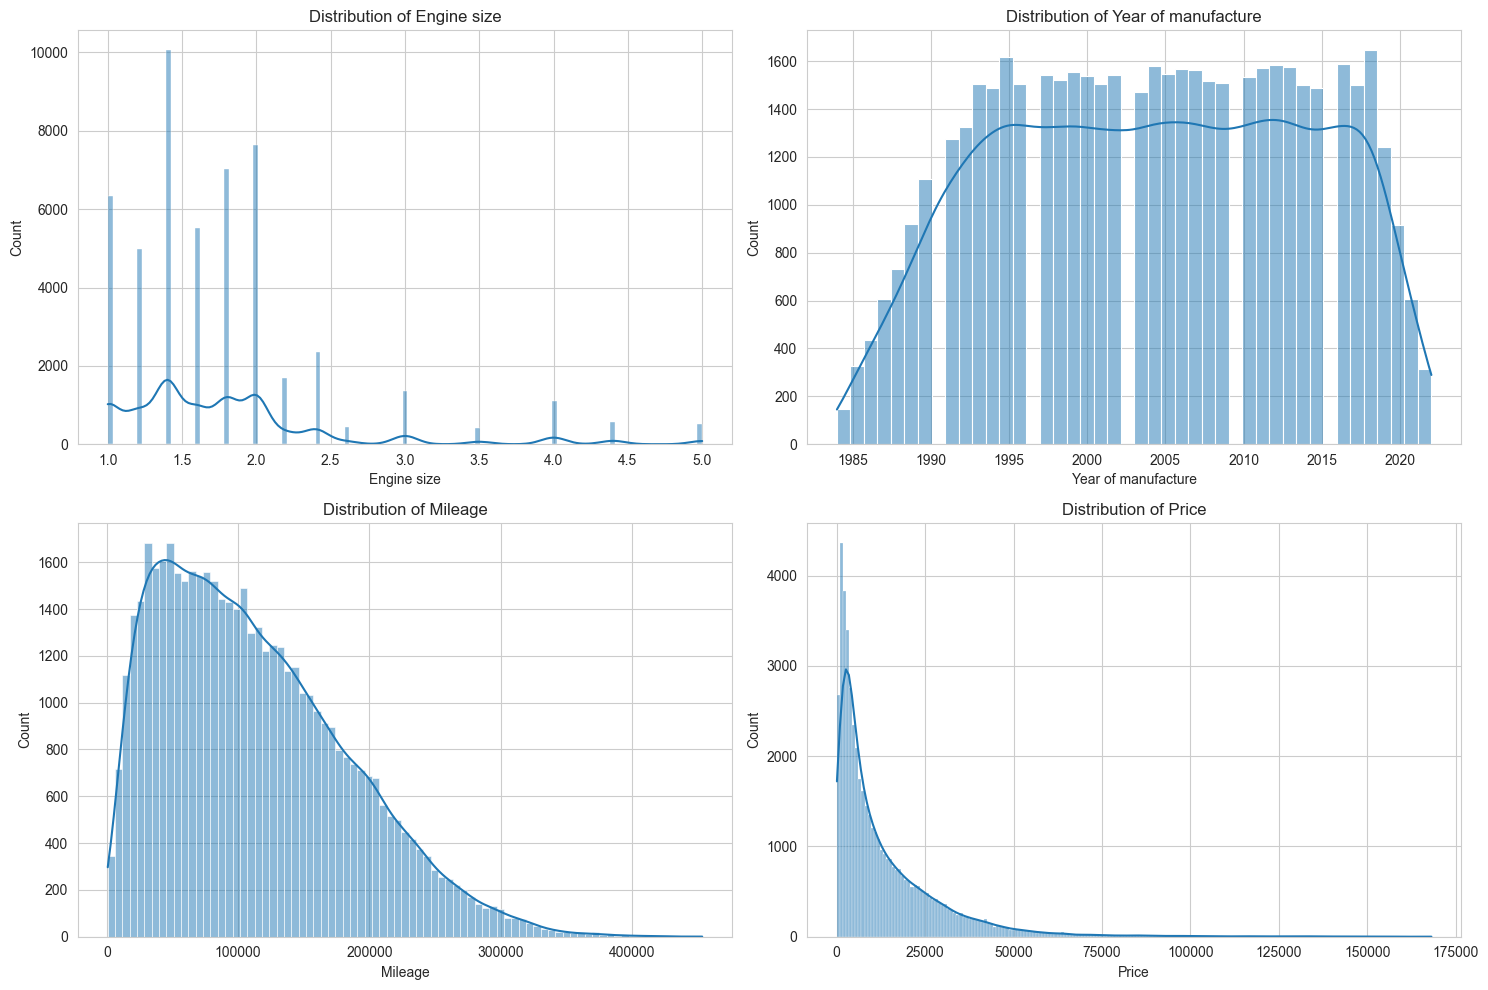

In [8]:
# Distribution of Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Engine size', 'Year of manufacture', 'Mileage', 'Price'], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(car_sale[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

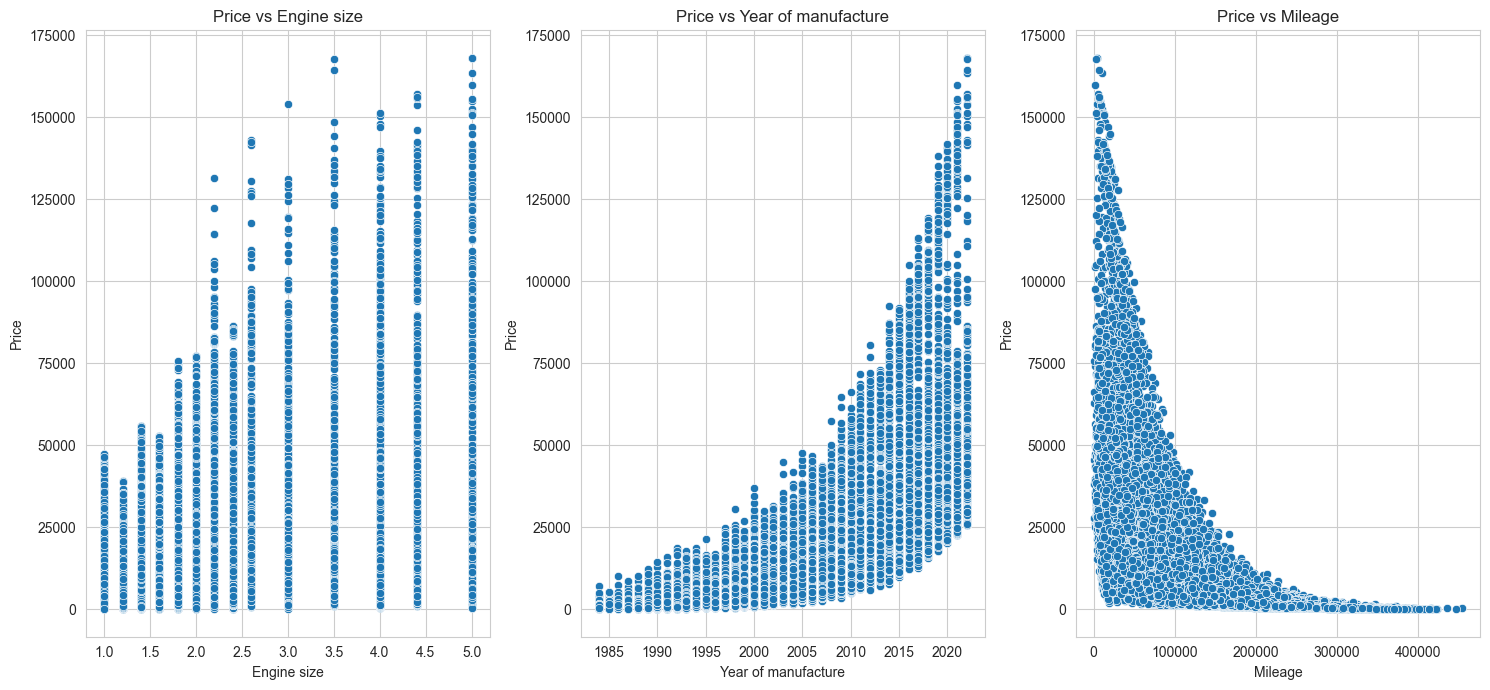

In [9]:
# Relationship with Price
plt.figure(figsize=(15, 7))
for i, col in enumerate(['Engine size', 'Year of manufacture', 'Mileage'], start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=car_sale[col], y=car_sale['Price'])
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

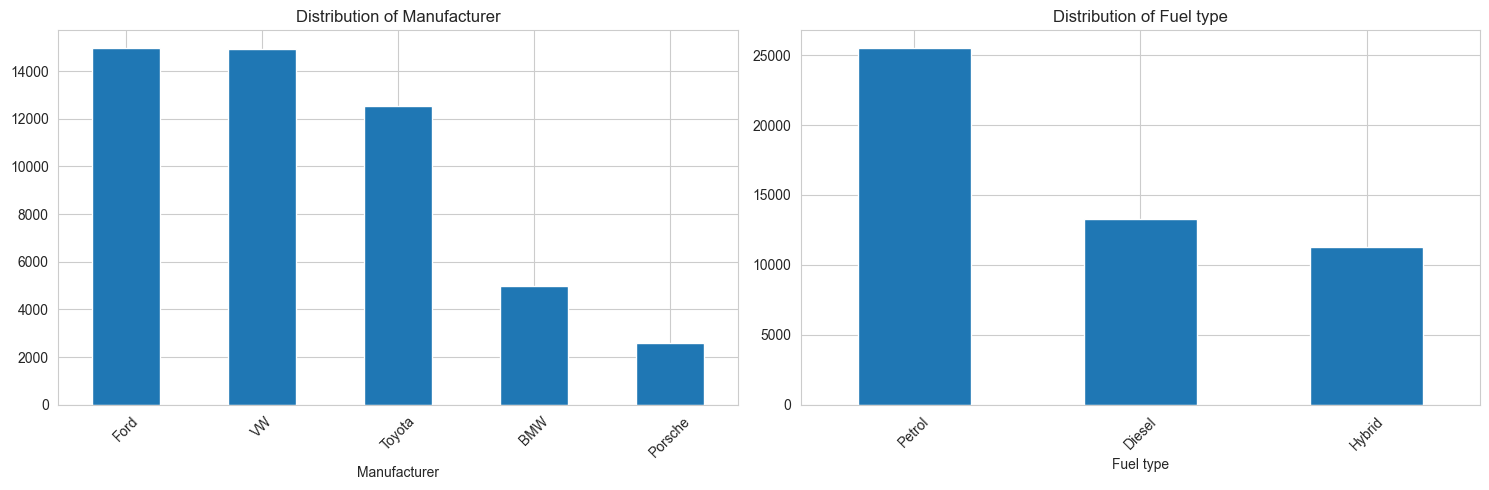

In [10]:
# Categorical Features Analysis
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Manufacturer', 'Fuel type'], start=1):
    plt.subplot(1, 2, i)
    car_sale[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Model Building

In [11]:
# Linear & Non-linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Define the linear regression evaluation function
def linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_linear = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_linear)
    r2 = r2_score(y_test, y_pred_linear)
    return mse, r2

# Define the polynomial regression evaluation function
def polynomial_regression(X, y, degree=2):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    return linear_regression(X_poly, y)

# List of numerical features
numerical_features = ['Engine size', 'Year of manufacture', 'Mileage']

# Dictionary to hold results
results_comparison = {}

# Evaluate each numerical feature
for feature in numerical_features:
    # Linear Regression
    mse_linear, r2_linear = linear_regression(car_sale[[feature]], car_sale['Price'])

    # Polynomial Regression (Degree 2)
    mse_poly, r2_poly = polynomial_regression(car_sale[[feature]], car_sale['Price'], degree=2)

    # Storing results in a more straightforward structure
    results_comparison[feature] = {
        'Linear MSE': mse_linear, 
        'Linear R2': r2_linear,
        'Non-linear MSE (Degree 2)': mse_poly, 
        'Non-linear R2 (Degree 2)': r2_poly
    }

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(results_comparison).T
results_df

,Linear MSE,Linear R2,Non-linear MSE (Degree 2),Non-linear R2 (Degree 2)
Engine size,2.282817e+08,0.164588,2.280229e+08,0.165535
Year of manufacture,1.353098e+08,0.504825,1.084359e+08,0.603172
Mileage,1.657419e+08,0.393457,1.345533e+08,0.507593


### Predicted Values

In [12]:
# Linear
# Splitting the dataset
X_train_linear, X_test_linear, y_train, y_test = train_test_split(car_sale[[feature]], car_sale['Price'], test_size=0.2, random_state=0)

# Training the model
model_linear = LinearRegression()
model_linear.fit(X_train_linear, y_train)

# Generating predictions
y_pred_linear = model_linear.predict(X_test_linear)

# Non-Linear
# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(car_sale[[feature]])

# Splitting the data into training and testing sets
y = car_sale['Price']
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Training the Polynomial Regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Generating predictions for the test set
y_pred_poly = model_poly.predict(X_test_poly)

## Multiple Feature Regression

In [13]:
# Multiple Feature Regression
features = ['Engine size', 'Year of manufacture', 'Mileage']
mse_multi, r2_multi = linear_regression(car_sale[features], car_sale['Price'])

print(f"Multiple Feature Regression, MSE: {mse_multi}, R2 Score: {r2_multi}")

# Splitting the data into training and testing sets
X = car_sale[features]
y = car_sale['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Multiple Feature Linear Regression model
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Generating predictions for the test set
y_pred_multiple = model_multiple.predict(X_test)

Multiple Feature Regression, MSE: 88813836.70787163, R2 Score: 0.6749798831772387


## Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor

# One-hot encoding the categorical variables in the original dataframe
car_sales_encoded = pd.get_dummies(car_sale, columns=['Manufacturer', 'Model', 'Fuel type'])

# Prepare the data
X = car_sales_encoded.drop('Price', axis=1) # car_sales_encoded includes encoded categorical features
y = car_sales_encoded['Price']

# Train the Random Forest Regressor
def random_forest_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    y_pred_rf = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)
    return y_pred_rf, mse, r2  # Return the predictions as well

y_pred_rf, mse_rf, r2_rf = random_forest_regression(X, y)  # Capture the predictions

print(f"Random Forest Regression, MSE: {mse_rf}, R2 Score: {r2_rf}")

Random Forest Regression, MSE: 449609.25127499993, R2 Score: 0.9983546251711357


## Artificial Neural Network

In [15]:
# Using TensorFlow and Keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Buildinging the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

In [16]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - 1s 879us/step - loss: 134375104.0000 - val_loss: 23642266.0000
Epoch 2/10
1000/1000 [==============================] - 1s 771us/step - loss: 19371304.0000 - val_loss: 11019165.0000
Epoch 3/10
1000/1000 [==============================] - 1s 798us/step - loss: 8916147.0000 - val_loss: 4939374.0000
Epoch 4/10
1000/1000 [==============================] - 1s 791us/step - loss: 4072910.5000 - val_loss: 2272896.5000
Epoch 5/10
1000/1000 [==============================] - 1s 939us/step - loss: 2056304.6250 - val_loss: 1685064.7500
Epoch 6/10
1000/1000 [==============================] - 1s 827us/step - loss: 1236900.0000 - val_loss: 841581.9375
Epoch 7/10
1000/1000 [==============================] - 1s 898us/step - loss: 810579.1250 - val_loss: 648298.0000
Epoch 8/10
1000/1000 [==============================] - 1s 780us/step - loss: 603496.7500 - val_loss: 422979.8750
Epoch 9/10
1000/1000 [==============================] - 1s 765us/step - 

In [17]:
# Evaluating the model
mse_nn = model.evaluate(X_test, y_test)
print(f"Neural Network MSE: {mse_nn}")

313/313 [==============================] - 0s 602us/step - loss: 462643.1562
Neural Network MSE: 462643.15625


In [18]:
# Predicting and calculate R² Score
y_pred_nn = model.predict(X_test)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network R2 Score: {r2_nn}")

313/313 [==============================] - 0s 499us/step
Neural Network R2 Score: 0.9983069270923344


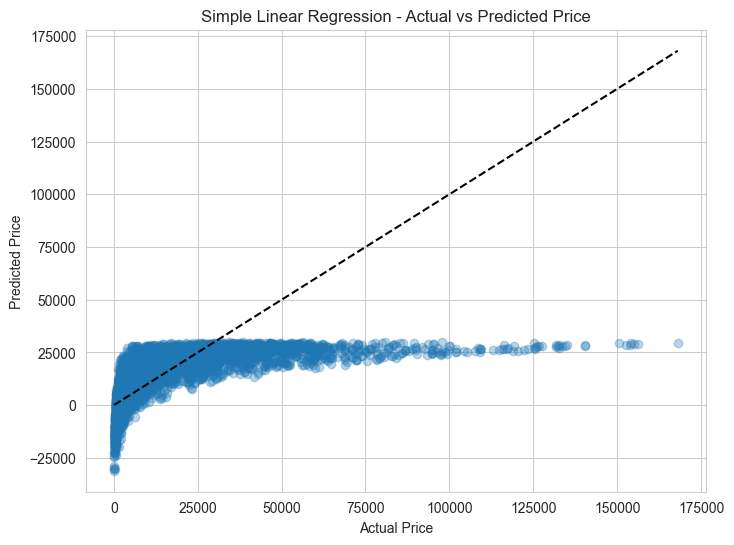

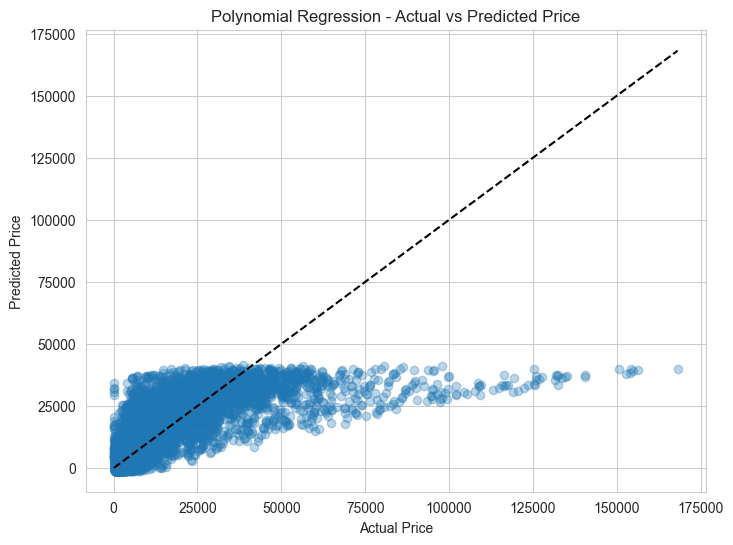

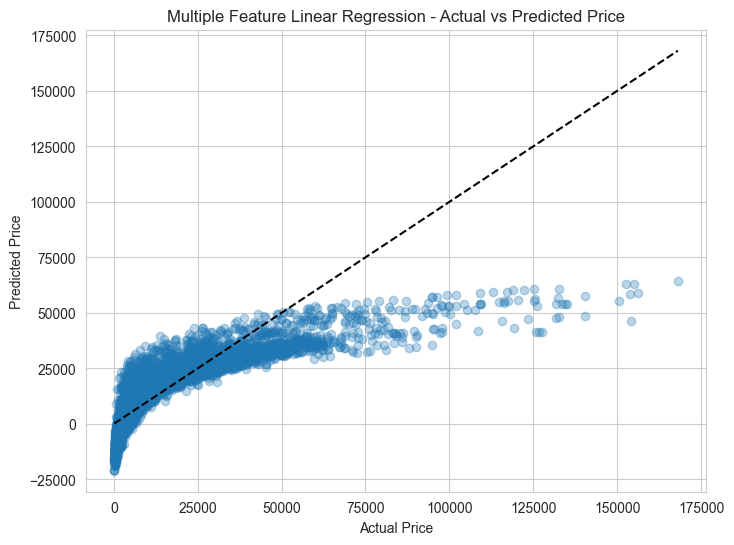

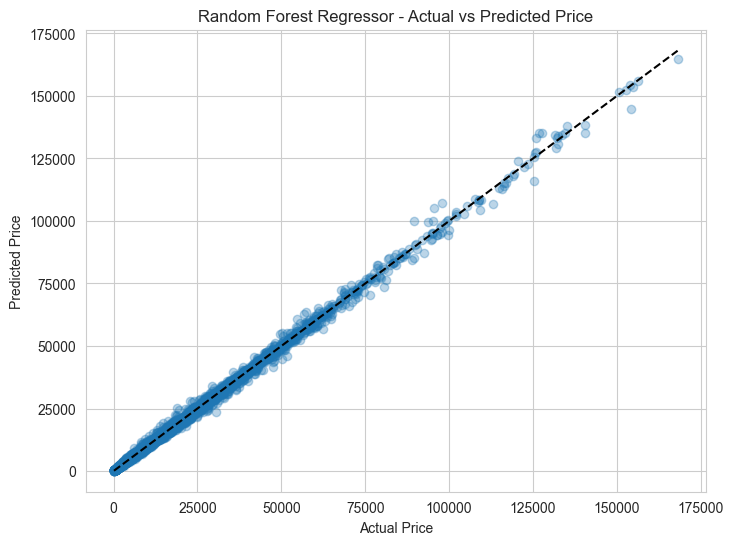

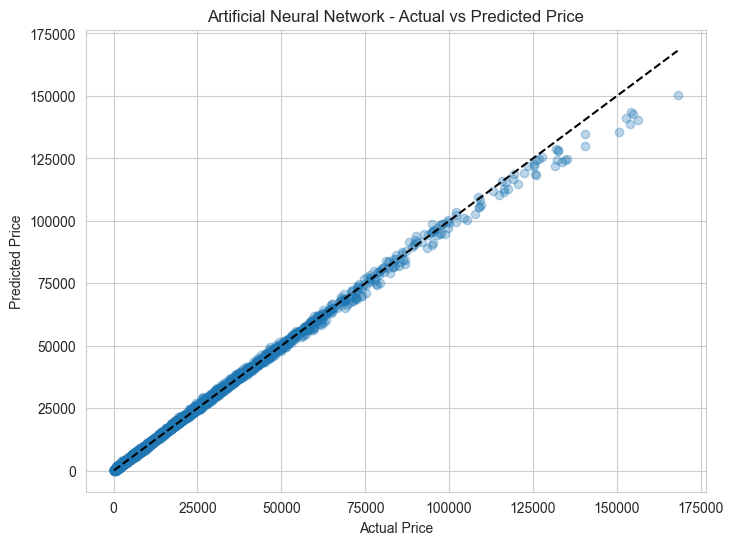

In [19]:
import matplotlib.pyplot as plt

# Function to plot predictions vs actual values
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name} - Actual vs Predicted Price')
    plt.show()

# Plot for Simple Linear Regression
plot_predictions(y_test, y_pred_linear, 'Simple Linear Regression')

# Plot for Polynomial Regression
plot_predictions(y_test, y_pred_poly, 'Polynomial Regression')

# Plot for Multiple Feature Linear Regression
plot_predictions(y_test, y_pred_multiple, 'Multiple Feature Linear Regression')

# Plot for Random Forest Regressor
plot_predictions(y_test, y_pred_rf, 'Random Forest Regressor')

# Plot for Artificial Neural Network
plot_predictions(y_test, y_pred_nn, 'Artificial Neural Network')

## ANN Hyperparameter Tuning 

In [20]:
!pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable


In [21]:
from kerastuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Hypermodel
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32), 
                    activation='relu', input_shape=(X_train.shape[1],)))
    
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Dense(units=hp.Int(f'units_layer{i}', min_value=32, max_value=256, step=32), 
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    
    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']), loss='mse')
    
    return model

# KerasTuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Number of trials to run
    executions_per_trial=3,  # Number of models to train per trial
    directory='my_dir',
    project_name='car_price_prediction'
)

tuner.search(X_train, y_train, epochs=20, validation_split=0.2)

Reloading Tuner from my_dir\car_price_prediction\tuner0.json


C:\Users\796656\AppData\Local\Temp\ipykernel_11688\2664442676.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [22]:
# Retrieving the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Retrieving the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Evaluating on the test set
y_pred_ann = best_model.predict(X_test)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print(f"ANN Test MSE: {mse_ann}, R2 Score: {r2_ann}")

313/313 [==============================] - 0s 664us/step
ANN Test MSE: 274074.43504345324, R2 Score: 0.9989970064553234


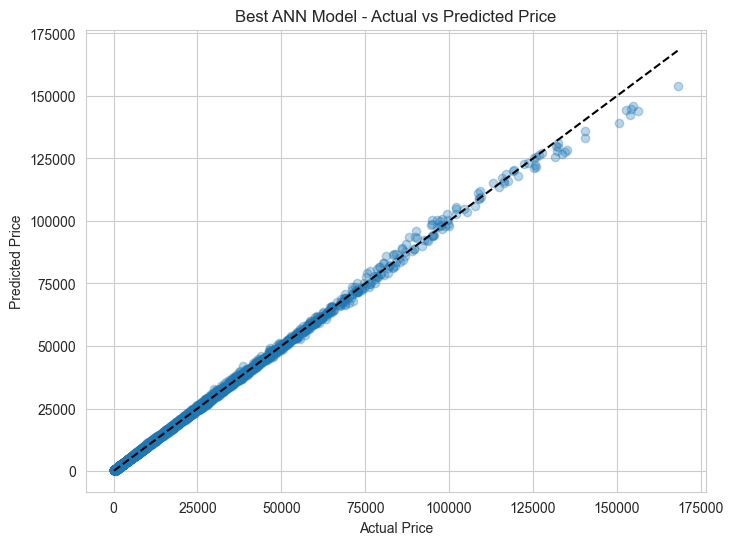

In [23]:
# Function to plot predictions vs actual values
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name} - Actual vs Predicted Price')
    plt.show()

# Plot for the ANN model
plot_predictions(y_test, y_pred_ann.flatten(), 'Best ANN Model')

# K-Means Clustering

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# NUmerical Features
features = ['Engine size', 'Year of manufacture', 'Mileage', 'Price']
X = car_sale[features]

# Elbow Method
wcss = []  # Within-cluster sum of squares
silhouette_scores = []
for i in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    if i > 1:  # Silhouette score is only relevant for 2 or more clusters
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

## Data Normalisation

In [25]:
# Normalize the features for each combination
scaler = StandardScaler()
X_comb1_scaled = scaler.fit_transform(car_sale[['Engine size', 'Mileage']])
X_comb2_scaled = scaler.fit_transform(car_sale[['Engine size', 'Price']])
X_comb3_scaled = scaler.fit_transform(car_sale[['Year of manufacture', 'Mileage']])
X_comb4_scaled = scaler.fit_transform(car_sale[['Year of manufacture', 'Mileage']])
X_comb5_scaled = scaler.fit_transform(car_sale[['Engine size', 'Year of manufacture', 'Mileage', 'Price']])

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate Within-Cluster Sum of Squares (WCSS) for different k
def calculate_wcss(X_scaled):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
        wcss.append(kmeans.inertia_)
    return wcss

# Now let's calculate the WCSS for each combination
wcss_comb1 = calculate_wcss(X_comb1_scaled)
wcss_comb2 = calculate_wcss(X_comb2_scaled)
wcss_comb3 = calculate_wcss(X_comb3_scaled)
wcss_comb4 = calculate_wcss(X_comb4_scaled)
wcss_comb5 = calculate_wcss(X_comb5_scaled)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

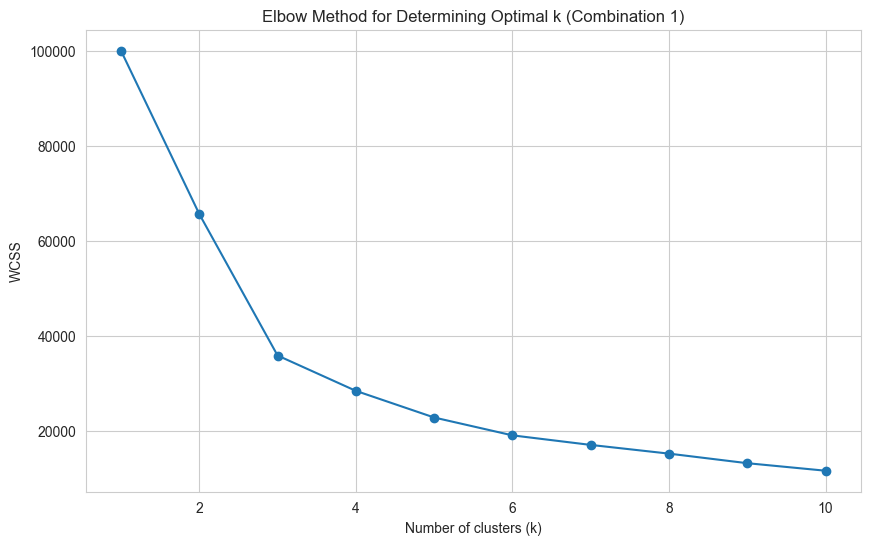

In [27]:
# Plotting the WCSS for the first combination
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_comb1, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Determining Optimal k (Combination 1)')
plt.show()

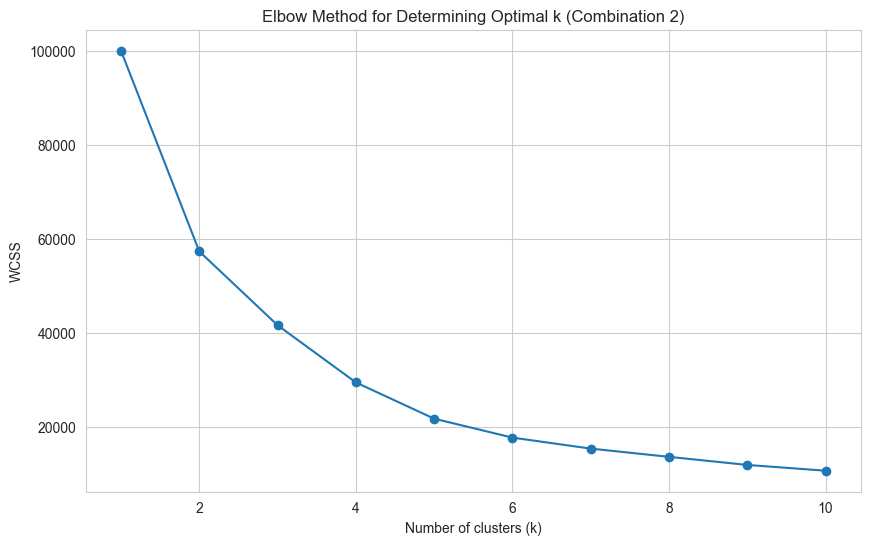

In [28]:
# Plotting the WCSS for the second combination
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_comb2, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Determining Optimal k (Combination 2)')
plt.show()

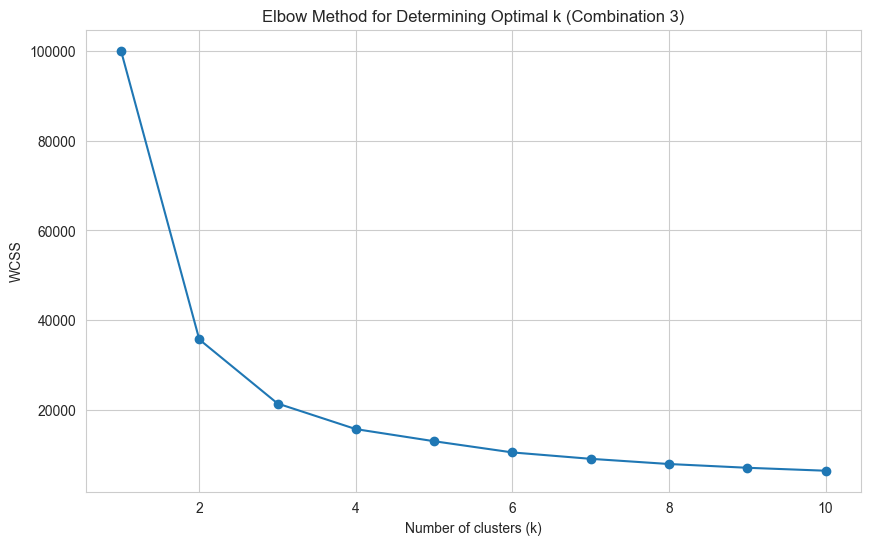

In [29]:
# Plotting the WCSS for the third combination
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_comb3, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Determining Optimal k (Combination 3)')
plt.show()

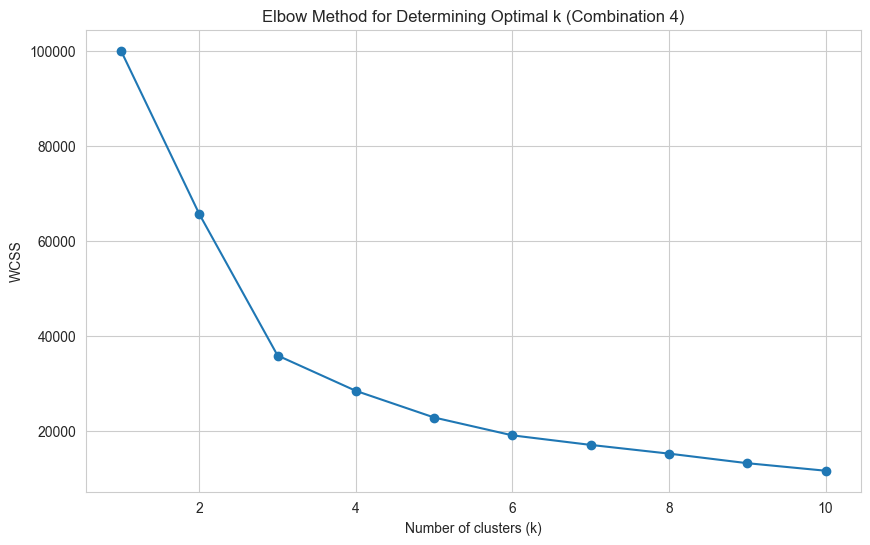

In [30]:
# Plotting the WCSS for the fourth combination
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_comb1, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Determining Optimal k (Combination 4)')
plt.show()

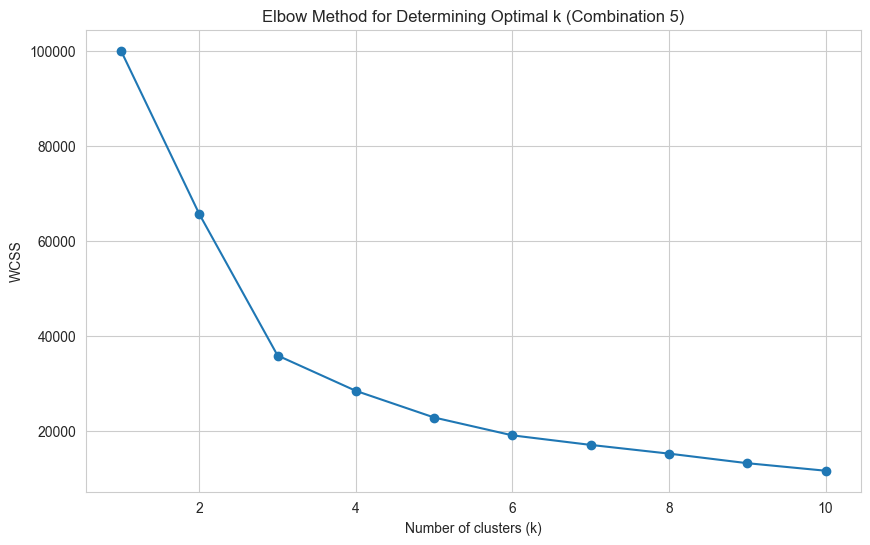

In [31]:
# Plotting the WCSS for the fifth combination
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_comb1, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Determining Optimal k (Combination 5)')
plt.show()

### Calculating Silhouette Score

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# This function computes k-means and silhouette scores for a given range of k
def calculate_silhouette_scores(X_scaled):
    silhouette_scores = []
    for k in range(2, 11):  # Testing from 2 to 10 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append((k, score))
    return silhouette_scores

# Calculate silhouette scores for each combination
silhouette_scores_comb1 = calculate_silhouette_scores(X_comb1_scaled)
silhouette_scores_comb2 = calculate_silhouette_scores(X_comb2_scaled)
silhouette_scores_comb3 = calculate_silhouette_scores(X_comb3_scaled)
silhouette_scores_comb4 = calculate_silhouette_scores(X_comb4_scaled)
silhouette_scores_comb5 = calculate_silhouette_scores(X_comb5_scaled)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

In [33]:
# Find the number of clusters that has the highest silhouette score for each combination
best_k_comb1 = max(silhouette_scores_comb1, key=lambda x: x[1])[0]
best_k_comb2 = max(silhouette_scores_comb2, key=lambda x: x[1])[0]
best_k_comb3 = max(silhouette_scores_comb3, key=lambda x: x[1])[0]
best_k_comb4 = max(silhouette_scores_comb4, key=lambda x: x[1])[0]
best_k_comb5 = max(silhouette_scores_comb5, key=lambda x: x[1])[0]

# Print the best k for each combination
print(f'Best k for Combination 1: {best_k_comb1} with Silhouette Score: {max(silhouette_scores_comb1, key=lambda x: x[1])[1]}')
print(f'Best k for Combination 2: {best_k_comb2} with Silhouette Score: {max(silhouette_scores_comb2, key=lambda x: x[1])[1]}')
print(f'Best k for Combination 3: {best_k_comb3} with Silhouette Score: {max(silhouette_scores_comb3, key=lambda x: x[1])[1]}')
print(f'Best k for Combination 4: {best_k_comb4} with Silhouette Score: {max(silhouette_scores_comb4, key=lambda x: x[1])[1]}')
print(f'Best k for Combination 5: {best_k_comb5} with Silhouette Score: {max(silhouette_scores_comb5, key=lambda x: x[1])[1]}')

Best k for Combination 1: 3 with Silhouette Score: 0.4500148275940677
Best k for Combination 2: 2 with Silhouette Score: 0.6210486171369451
Best k for Combination 3: 2 with Silhouette Score: 0.5334431404238139
Best k for Combination 4: 2 with Silhouette Score: 0.5334431404238139
Best k for Combination 5: 3 with Silhouette Score: 0.4093777993502264


## Agglomerative Clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering

# This function computes Hierarchical Agglomerative Clustering and silhouette scores for a given range of k
def calculate_silhouette_scores_hierarchical(X_scaled):
    silhouette_scores_hierarchical = []
    for k in range(2, 11):  # Testing from 2 to 10 clusters as before
        clustering = AgglomerativeClustering(n_clusters=k)
        labels = clustering.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores_hierarchical.append((k, score))
    return silhouette_scores_hierarchical

# Calculate silhouette scores for each combination with Hierarchical Agglomerative Clustering
silhouette_scores_hierarchical_comb1 = calculate_silhouette_scores_hierarchical(X_comb1_scaled)
silhouette_scores_hierarchical_comb2 = calculate_silhouette_scores_hierarchical(X_comb2_scaled)
silhouette_scores_hierarchical_comb3 = calculate_silhouette_scores_hierarchical(X_comb3_scaled)
silhouette_scores_hierarchical_comb4 = calculate_silhouette_scores_hierarchical(X_comb4_scaled)
silhouette_scores_hierarchical_comb5 = calculate_silhouette_scores_hierarchical(X_comb5_scaled)

In [37]:
# Hierarchical Clustering
best_hierarchical_score_comb1 = max(silhouette_scores_hierarchical_comb1, key=lambda x: x[1])[1]
best_hierarchical_score_comb2 = max(silhouette_scores_hierarchical_comb2, key=lambda x: x[1])[1]
best_hierarchical_score_comb3 = max(silhouette_scores_hierarchical_comb3, key=lambda x: x[1])[1]
best_hierarchical_score_comb4 = max(silhouette_scores_hierarchical_comb4, key=lambda x: x[1])[1]
best_hierarchical_score_comb5 = max(silhouette_scores_hierarchical_comb5, key=lambda x: x[1])[1]

# Compare these scores to the ones from k-Means
print(f'Best Silhouette Score for Combination 1 (Hierarchical): {best_hierarchical_score_comb1}')
print()
print(f'Best Silhouette Score for Combination 2 (Hierarchical): {best_hierarchical_score_comb2}')
print()
print(f'Best Silhouette Score for Combination 3 (Hierarchical): {best_hierarchical_score_comb3}')
print()
print(f'Best Silhouette Score for Combination 4 (Hierarchical): {best_hierarchical_score_comb4}')
print()
print(f'Best Silhouette Score for Combination 5 (Hierarchical): {best_hierarchical_score_comb5}')

Best Silhouette Score for Combination 1 (Hierarchical): 0.42019491657022806

Best Silhouette Score for Combination 2 (Hierarchical): 0.5557821964687533

Best Silhouette Score for Combination 3 (Hierarchical): 0.5052124673343983

Best Silhouette Score for Combination 4 (Hierarchical): 0.5052124673343983

Best Silhouette Score for Combination 5 (Hierarchical): 0.3342550768151847
